# Análisis de Sentimientos mediante Redes neuronales
- Universidad Politécnica
- Máster Universitario en Inteligencia Artificial
- Web Science
- Enero 2020

## Autores
- Antonio Sejas Mustafá
- Elena Saa Noblejas

# INTRODUCCIÓN

El objetivo de esta práctica es realizar una aplicación implementando alguno de los métodos vistos en clase. Por tanto tuvimos que elegir entre Sistema de recomendación, Clasificación de documentos siguiendo Topic Models, Reconocimiento de Entidades o Análisis de Sentimiento.

Nosotros decidimos desarrollar este último proyecto. De este modo, nuestro objetivo es realizar una aplicación que dado un texto sea capaz de identificar si caracter positivo o negativo.

Más concretamente hemos decidido trabajar sobre un dataset ya conocido. El data set de reviews de películas de IMDB. En el siguiente apartado ampliamos la información sobre el data set y comentamos dónde está disponible para su descarga.

Nuestros textos, como ya hemos comentado son reviews de películas, y el sentimiento será si una review le ha gustado a un usuario o no.

**¿Pero cómo vamos a evaluar nuestra aplicación?**

Un texto puede estar lleno de ambiguedad, incluso una misma review puede tener comentarios pariales de caracter positivo y otras críticas negativas. Nosotros vamos a ignorar estas situaciones y seguiremos el gold standard marcado por el artículo descrito en Maas, A. L. et. al. 2011 [1]

En este artículo se describe que las reviews positivas son aquellas que tengan una nota de 7 estrellas o más. Y de forma equivalente las negativas son las que tengan asociada una valoración de 0 a 4 estrellas. De esta forma no se tienen en cuenta los textos más ambiguos o indecisos, las reseñas Neutrales.


## El Dataset de IMDB
Este data set ha sido realizado por los investigadores de Stanford autores del artículo original [1] .

El data set original está disponible en: http://ai.stanford.edu/~amaas/data/sentiment/

El data set cuenta con 50.000 reviews, que ellos utilizaron 25.000 para entrenamiento y 25.000 para testing. Nosotros para reducir complejidad solo usaremos una mitad, que hemos tratado previamente para eliminar caracteres raros y poner los textos en minúsculas.

Además este dataset cuenta con un porcentaje equilibrado de reseñas. Siendo la mitad positivas y la otra mitad negativas.

Cada review tiene una etiqueta que lo categoriza de positiva o negativamente.


## Tecnologías utilizadas

A continuación describimos la metodología que hemos seguido para el analizador de sentimientos. Cada uno de estos puntos corresopnde con una sección del código.

**Limpieza del data set**

El primer paso es analizar y hacer un tratamiento de los textos del dataset. En el área de procesamiento del lenguaje natural hay una gran cantidad de alternativas y posibilidades. Es posible realizar distintas representación de los textos del corpus, y una gran variedad de extracción de características.

El planteamiento del analizador de sentimientos puede verse de alguna forma con un clasificador de textos, en el que se intenta clasificar un text (review) como positivo o negativo.

Por este motivo todos los métodos de representación utiizados en PLN son válidos. Algunos de estos modelos son: bag of words, vector space model, tf-idf, topic model.

Nosotros hemos decidido obtener una bolsa de palabras (bag of words), teniendo en cuenta la frecuencia relativa con respecto a la otra clase. La idea es similar a un TF-IDF pero a nivel de clase. Esta representación nos permitirá darle más peso a las palabras más polarizadas.

Por mantener determinar un límite en esta práctica no aplicaremos ningún procedimiento lematización ni stemming. Tampoco utilizaremos n-gramas. Únicamente eliminaremos las palabras vacías, stopwords, para reducir el ruido de los datos. La tokenización utilizada consiste en convertir las palabas en índices de un array. Todo este tipo de técnicas las hemos visto en clase y también se describen en más detalle en el libro"Natural Language Processing in Action" [3]

**Entrenamiento**

De forma similar a la limipieza del dataset y la extracción de variables predictoras, en el entrenamiento podemos utilizar prácticamente cualquier algoritmo de clasificación. Desde un Naive Bayes, Support Vector Machine, árboles de decisión o redes neuronales son algunas de las opciones más utilizadas.

Nosotros al no haber cursado ninguna asignatura de redes neuronales, hemos decidido utilizar una red neuronal, en concreto un Perceptrón multicapa.

La primera capa, capa de entrada, tendrá tantos nodos como palabras haya en nuestro vocabulario. La segunda capa tendrá 30 nodos, de forma experimental hemos observado un buen comportamiento con 10 a 30 nodos.

Por último la capa de salida tendrá un solo nodo que dará un valor comprendido entre 0 y 1. Cuanto más cerca del 1 , más positiva se considerará la reseña. Un valor cercano al 0.5 se considerará la reseña "neutral".


**Validación**

Por último, nosotros hemos preferido evaluar la precisión de nuestro algoritmo utilizando un dropout 70/30 por sencillez de implementación. Una solución más profesional requeriría utilizar métodos de validación más sofistiados como un k-fold.

Además hemos observado que incluso usando la mitad del data set de entrenamiento, obtenemos valores muy cercanos al SVM descrito en el artículo [1]. En el artículo se alcanzan precisiones de entorno al 0.88, mientras que como veremos nuestra red se queda en 0.86 debido a falta de reducción de ruido comentada anteriormente.

**Extra**

De forma adicional, hemos creado una celda con una caja de texto para que se pueda comprobar el fucionamiento con textos fuera del data set. Esta caja de texto está identificada bajo el título "Inserta un texto para probar el analizador de sentimientos". Hay que escribir un texto y ejecutar esa celda y la siguiente para ver los resultados.

- El código está autocontenido en este Jupyter Notebook. El cual está disponible online: https://colab.research.google.com/drive/11ZvUGrctfSbuTqa_tk3J-SNkEolqmZbK
- Además el código fuente y el dataset están disponibles en Github: https://github.com/sejas/muia-imdb-sentiment-analysis


## Referencias

1. Maas, A. L., Daly, R. E., Pham, P. T., Huang, D., Ng, A. Y., & Potts, C. (2011, June). Learning word vectors for sentiment analysis. In Proceedings of the 49th annual meeting of the association for computational linguistics: Human language technologies-volume 1 (pp. 142-150). Association for Computational Linguistics. [Descargar Artículo](http://ai.stanford.edu/~amaas/papers/wvSent_acl2011.pdf)

2. Hochreiter, Sepp & Schmidhuber, Jürgen. (1997). Long Short-term Memory. Neural computation. 9. 1735-80. 10.1162/neco.1997.9.8.1735. 

3. Lane, H., Howard, C., & Hapke, H. M. (2019). Natural Language Processing in Action: Understanding, Analyzing, and Generating Text with Python. Manning Publications Company.


# CARGA DEL DATASET

In [0]:
# Importar librerías
import sys
import pandas as pd
import numpy as np
from collections import Counter

In [0]:
# Carga de los datos en un dataframe
df = pd.read_csv('imdb.csv', index_col=0)
df.head()

,labels,reviews
0,POSITIVE,bromwell high is a cartoon comedy . it ran at ...
1,NEGATIVE,story of a man who has unnatural feelings for ...
2,POSITIVE,homelessness or houselessness as george carli...
3,NEGATIVE,airport starts as a brand new luxury pla...
4,POSITIVE,brilliant over acting by lesley ann warren . ...


In [0]:
len(df)

25000

Los datos de `imdb.csv` han sido preprocesados y el contenido está preparado para contener solo caracteres en minúsculas. Esto es para simplificar el la identificación de las palabras, independientemente de cómo hayan sido escritas.


# ANÁLISIS Y TRATAMIENTO PREVIO DEL DATA SET

Utilizando tres objetos `Counter` podemos calcular la frequencia absoluta para cada tipod e clase, positiva y negativa y un tercer counter para la contabilizar la frecuencia total de cada palabra en el corpus.

In [0]:
positive_freq = Counter()
negative_freq = Counter()
total_freq = Counter()

Además de contabilizar la frecuencia de cada palabra en cada clase y en total, aprovechamos para eliminar las palabras vacías previamente conocidas y facilitadas por sklearn.

In [0]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
custom_stopwords = stop_words.ENGLISH_STOP_WORDS.union(['br', '.'])
def remove_stopwords(text):
  return [word for word in text.split(' ') if word not in custom_stopwords]

In [0]:
for _, (label, review) in df[df['labels']=='POSITIVE'].iterrows():
  positive_freq += Counter(remove_stopwords(review))
for _, (label, review) in df[df['labels']=='NEGATIVE'].iterrows():
  negative_freq += Counter(remove_stopwords(review))

total_freq = positive_freq + negative_freq



Extraemos las palabras de las reseñas positivas y negativas ordenándolas de más a menos comunes.

In [0]:
positive_freq.most_common(20)

[('', 550468),
 ('s', 33815),
 ('film', 20937),
 ('movie', 19074),
 ('t', 13720),
 ('like', 9038),
 ('good', 7720),
 ('just', 7152),
 ('story', 6780),
 ('time', 6515),
 ('great', 6419),
 ('really', 5476),
 ('people', 4479),
 ('best', 4319),
 ('love', 4301),
 ('life', 4199),
 ('way', 4036),
 ('films', 3813),
 ('think', 3655),
 ('movies', 3586)]

In [0]:
negative_freq.most_common(20)

[('', 561462),
 ('s', 31546),
 ('movie', 24965),
 ('t', 20361),
 ('film', 19218),
 ('like', 11238),
 ('just', 10619),
 ('good', 7423),
 ('bad', 7401),
 ('really', 6262),
 ('time', 6209),
 ('don', 5336),
 ('story', 5208),
 ('people', 4806),
 ('make', 4722),
 ('plot', 4154),
 ('movies', 4080),
 ('acting', 4056),
 ('way', 3989),
 ('think', 3643)]

Aunque hayamos quitado las palabras vacías de un diccionario, hay un gran número de palabras vacías intrínsecas a nuestro dominio. En nuestro caso estas palabras que no aportan valor a la hora de distinguir entre una polarización positivia o negativa deberían ser consideradas como palabras vacías. Un ejemplo de estas palabras son muchas de las que aparecen en las listas de arriba. film, movie, acting y muchos nombres de actores y películas.

A continuación calculamos el ratio de las palabras positivas entre las negativas, esto nos indicará si una palabra es muy positiva, neutra o nada positiva. 

La forma de calcular este ratio de frecuencia es:
`número de usos positivos / (número de usos negativos+1)`

Se le añade `+1` al denominador para no dividir entre 0.

In [0]:
MIN_FREQ = 200
positive_negative_prop = Counter()

for word,freq in list(total_freq.most_common()):
    if(freq > MIN_FREQ):
        proportion = positive_freq[word] / float(negative_freq[word]+1)
        positive_negative_prop[word] = proportion

Examinamos el ratio de algunas palabras:

In [0]:
def check_words(words_list):
  for word_to_check in words_list:
    print("Word '%s' = %s"%(word_to_check, positive_negative_prop[word_to_check]))
check_words(['film', 'fantastic', 'bad'])

Word 'film' = 1.089390707112753
Word 'fantastic' = 4.503448275862069
Word 'bad' = 0.2576330721426641


Como podemos ver, las palabras positivas tendrán valores muy altos. (>1)
Las palabras neutrales que aparecen en reviews positivas o negativas, tendrán valores muy cercanos a 1. (Equilibradas)
Y las palabras negativas estarán muy próximas a 0.

In [0]:
for word,ratio in positive_negative_prop.most_common():
    positive_negative_prop[word] = np.log(ratio)

Una forma sencilla de normalizar estos valores y conseguir que las palabras neutrales estén en torno al 0 en vez de entorno al 1, es usando la función logaritmo.

A continuación comprobamos las mismas palabras anterioremente comprobadas y observamos los nuevos valores normalizados.

In [0]:
check_words(['film', 'fantastic', 'bad'])

Word 'film' = 0.08561855565085673
Word 'fantastic' = 1.5048433868558566
Word 'bad' = -1.3562189073456823


Arriba vemos que film, apenas aporta un valor discriminatorio.

A continuación vemos la lista de palabras más polarizadas y sus nuevos valores.

In [0]:
positive_negative_prop.most_common(20)

[('victoria', 2.681021528714291),
 ('captures', 2.038619547159581),
 ('wonderfully', 2.0218960560332353),
 ('powell', 1.978345424808467),
 ('refreshing', 1.8551812956655511),
 ('delightful', 1.8002701588959635),
 ('beautifully', 1.7626953362841438),
 ('underrated', 1.7197859696029656),
 ('superb', 1.7091514458966952),
 ('welles', 1.667706820558076),
 ('sinatra', 1.6389967146756448),
 ('touching', 1.637217476541176),
 ('stewart', 1.611998733295774),
 ('brilliantly', 1.5950491749820008),
 ('friendship', 1.5677652160335325),
 ('wonderful', 1.5645425925262093),
 ('magnificent', 1.54663701119507),
 ('finest', 1.546259010812569),
 ('jackie', 1.5439233053234738),
 ('freedom', 1.5091151908062312)]

In [0]:
list(reversed(positive_negative_prop.most_common()))[0:20]

[('unfunny', -2.6922395950755678),
 ('waste', -2.6193845640165536),
 ('pointless', -2.4553061800117097),
 ('redeeming', -2.3682390632154826),
 ('lousy', -2.307572634505085),
 ('worst', -2.286987896180378),
 ('laughable', -2.264363880173848),
 ('awful', -2.227194247027435),
 ('poorly', -2.2207550747464135),
 ('sucks', -1.987068221548821),
 ('lame', -1.981767458946166),
 ('insult', -1.978345424808467),
 ('horrible', -1.9102590939512902),
 ('amateurish', -1.9095425048844386),
 ('pathetic', -1.9003933102308506),
 ('wasted', -1.8382794848629478),
 ('crap', -1.8281271133989299),
 ('tedious', -1.802454758344803),
 ('dreadful', -1.7725281073001673),
 ('badly', -1.753626599532611)]

La aparición de "Victoria" parece indicar que sus películas tienen asociadas muy buenas críticas. Pero sabemos que en inglés hace referencia a un nombre propio, por lo que  para mejorar nuestra predicción habría considerar los nombres propios como stopwords.

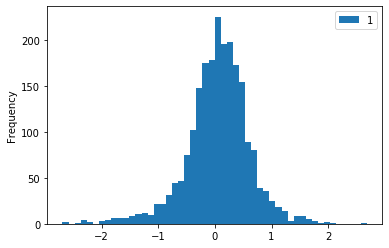

In [0]:
pd.DataFrame(positive_negative_prop.most_common()).plot.hist(bins=50)

Este histograma nos enseña la polaridad de las palabras en todo el corpus. Podemos observar que sigue una distribución normal con media en torno al 0. Es decir, la mayoría de las palabras están categorizadas como neutrales. Esto es ruido en nuestro clasificador. Esto se podría solucionar teniendo en cuenta aquellas palabas que aporten un valor discriminatorio mayor de |0.5|

# GENERANDO NUESTRO VOCABULARIO
A continuación para "tokenizar" nuestros textos y convertirlos en vector de palabras, vamos a crear un vocabulario que será la entrada de nuestra red neuronal.

In [0]:
vocab = set(total_freq.keys())

In [0]:
vocab_size = len(vocab)
print(vocab_size)

73759


In [0]:
word2index = {}
for i,word in enumerate(vocab):  
    word2index[word] = i
word2index

{'': 0,
 'pork': 1,
 'cancer': 2,
 'hypermacho': 3,
 'beam': 4,
 'didja': 5,
 'sires': 6,
 'colonised': 7,
 'jest': 8,
 'fem': 9,
 'mitochondrial': 10,
 'azuma': 11,
 'stunk': 12,
 'attracting': 13,
 'cathernine': 14,
 'ventricle': 15,
 'ding': 16,
 'religous': 17,
 'training': 18,
 'cranks': 19,
 'hobbs': 20,
 'novac': 21,
 'millennia': 22,
 'zinn': 23,
 'sacrilage': 24,
 'mistry': 25,
 'sensualists': 26,
 'giff': 27,
 'bungling': 28,
 'raechel': 29,
 'swedes': 30,
 'miffed': 31,
 'ultimate': 32,
 'dought': 33,
 'plagiaristic': 34,
 'limned': 35,
 'jee': 36,
 'aracnophobia': 37,
 'centerpiece': 38,
 'unfaithal': 39,
 'knievel': 40,
 'ecstacy': 41,
 'trudged': 42,
 'alun': 43,
 'habituation': 44,
 'cannibalism': 45,
 'alarmist': 46,
 'looney': 47,
 'sudser': 48,
 'min': 49,
 'michelle': 50,
 'winninger': 51,
 'deployment': 52,
 'menzel': 53,
 'demonstrative': 54,
 'overpowered': 55,
 'seema': 56,
 'psychotics': 57,
 'coughthe': 58,
 'rollin': 59,
 'interferring': 60,
 'shimbei': 61,
 '

# CLASIFICADOR MEDIANTE RED NEURONAL

Ya nos acercamos al final de nuestro analizador de sentimientos. Hemos decidido utilizar una red neuronal clásica, que como ya hemos comentado en la introducción posee 3 capas. La primera que es de entradas y tiene la longitud de nuestro vocabulario. Cada review se codificará como un vector en el que cada cada elemento representa la frequencia de apariciones de esa palabra en el texto. La capa intermedia tiene 30 nodos, y finalmente la capa final tiene un solo nodo de salida.

Nuestro clasificador puede en modo entrenamiento y test devuelve 2 etiquetas Positivo o Negativo. Y en modo interactivo (logger), además devuelve el nivel de confianza y una tercera etiqueta Neutral.

In [0]:
class SentimentReviewClassifier:
    def __init__(self, learning_rate = 0.01):
        np.random.seed(7)
        self.input_nodes = len(vocab)
        self.middle_nodes = 30
        self.final_nodes = 1
        self.learning_rate = learning_rate

        # Initialize net
        self.hidden_0_1 = np.zeros((self.input_nodes,self.middle_nodes))
        self.hidden_1_2 = np.random.normal(0.0, self.middle_nodes**-0.5, 
                                                (self.middle_nodes, self.final_nodes))
        self.first_layer = np.zeros((1,self.middle_nodes))
    
    translate_label = {
        'POSITIVE': 1,
        'NEGATIVE': 0,
    }
        
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_output_2_derivative(self,output):
        return output * (1 - output)
    def show_progress(self, i, total, correct):
        progress =  str(100 * i/float(total))[:4]
        accuracy =  str(correct * 100 / float(i+1))[:4]
        sys.stdout.write("\r - Progress:%s %%| Correct:%s | Accuracy:%s%%"%(progress, correct, accuracy))
        
    def train(self, reviews_corpus, labels_t):
        """ Update weights from corpus"""
        reviews = list()
        for review in reviews_corpus:
            indices = set()
            for word in remove_stopwords(review):
                if(word in word2index.keys()):
                    indices.add(word2index[word])
            reviews.append(list(indices))

        correct = 0
        for i in range(len(reviews)):
            review = reviews[i]
            label = labels_t[i]
            # Training
            self.first_layer *= 0
            for index in review:
                self.first_layer += self.hidden_0_1[index]
            second_layer = self.sigmoid(self.first_layer.dot(self.hidden_1_2))            

            # Output error
            second_layer_error = second_layer - self.translate_label[label]
            second_layer_delta = second_layer_error * self.sigmoid_output_2_derivative(second_layer)

            # Backpropagated error
            first_layer_error = second_layer_delta.dot(self.hidden_1_2.T)
            first_layer_delta = first_layer_error
            self.hidden_1_2 -= self.first_layer.T.dot(second_layer_delta) * self.learning_rate

            for index in review:
                self.hidden_0_1[index] -= first_layer_delta[0] * self.learning_rate

            if(second_layer >= 0.5 and label == 'POSITIVE'):
                correct += 1
            elif(second_layer < 0.5 and label == 'NEGATIVE'):
                correct += 1
            self.show_progress(i, len(reviews), correct)
            if(i % 2500 == 0):
                print("")
    
    def test(self, reviews, testing_labels):
        """ Test and don't update the weights """
        correct = 0
        for i in range(len(reviews)):
            pred = self.run(reviews[i])
            if(pred == testing_labels[i]):
                correct += 1
            self.show_progress(i, len(reviews), correct)
    
    def run(self, review, logger = False):
        """ Evaluate a single review"""
        self.first_layer *= 0
        unique_indices = set()
        for word in remove_stopwords(review):
            if word in word2index.keys():
                unique_indices.add(word2index[word])
        for index in unique_indices:
            self.first_layer += self.hidden_0_1[index]
        second_layer = self.sigmoid(self.first_layer.dot(self.hidden_1_2))
        out = second_layer[0]
        threshold = 0
        if logger:
          print(out)
          threshold = 0.05
        if out >= 0.5 + threshold:
            return "POSITIVE"
        elif out < 0.5 - threshold:
            return "NEGATIVE"
        else:
            return "NEUTRAL"


In [0]:
# Dividimos el dataset en 70% Training y 30% Testing
DROPOUT_PARTITION = 0.7
SPLIT_PART = int(len(df)*DROPOUT_PARTITION)
df_train = df.iloc[:SPLIT_PART]
df_test = df.iloc[SPLIT_PART:]
print("DROPOUT SPLIT Train: %d, Test: %d, TOTAL: %d"%(len(df_train), len(df_test), len(df_train)+len(df_test)))
df_test.head()

DROPOUT SPLIT Train: 17500, Test: 7500, TOTAL: 25000


,labels,reviews
17500,POSITIVE,one reason pixar has endured so well and been...
17501,NEGATIVE,i saw the film and i got screwed because the ...
17502,POSITIVE,a scanner darkly minority report blade runne...
17503,NEGATIVE,what s happening to rgv he seems to repeat h...
17504,POSITIVE,i ve seen this film in avant premiere at ima...


In [0]:
net = SentimentReviewClassifier(learning_rate=0.02)
net.train(df_train['reviews'],df_train['labels'])

 - Progress:0.0 %| Correct:1 | Accuracy:100.%
 - Progress:14.2 %| Correct:2028 | Accuracy:81.0%
 - Progress:28.5 %| Correct:4129 | Accuracy:82.5%
 - Progress:42.8 %| Correct:6277 | Accuracy:83.6%
 - Progress:57.1 %| Correct:8469 | Accuracy:84.6%
 - Progress:71.4 %| Correct:10629 | Accuracy:85.0%
 - Progress:85.7 %| Correct:12785 | Accuracy:85.2%
 - Progress:99.9 %| Correct:14934 | Accuracy:85.3%

In [0]:
# Cambiamos la forma de indexar por problemas en algún dato en el dataframe.
net.test(df_test.iloc[:,1].values, df_test.iloc[:,0].values)

 - Progress:99.9 %| Correct:6453 | Accuracy:86.0%

In [0]:
# Example of a single review
net.run('This a great film fantastic actors', logger=True)

[0.69505086]


'POSITIVE'

In [0]:
#@title ### Inserta un texto para probar el analizador de sentimientos
review = "This movie is the best in the world" #@param {type:"string"}

In [0]:
print('Review a analizar: "%s"'%review)
print('La Review es: %s'% net.run(review, logger=True))

Review a analizar: "This movie is the best in the world"
[0.6628306]
La Review es: POSITIVE


# CONCLUSIONES






Como hemos podido observar, hemos obtenido resultados muy semejantes a los propuestos en el paper [1].

Existen multitud de aproximaciones a un mismo problema.

Determinar la polaridad positiva o negativa de una reseña se puede conseguir con modelos relativamente sencillos.

Obtener datos más precisos, como qué tipo de sentimiento expresa, enfado, ira, amor, felicidad son un reto todavía en investigación.

Técnicas muy similares propuestas en esta práctica se pueden utilizar para detectar reseñas fraudulentas, la dificultad está en conseguir un dataset etiquetado.

Un analizador de sentimiento se puede simplificar a un clasificador de textos, en el que cada tópico es el sentimiento que queremos clasificar.

Posibles mejoras, un mayor tratamiento en la reducción ruido, mediante la eliminación de palabras vacías aumentaría la precisión de nuestra red.

Existen algoritmos más avanzados que posilemente den mejores resultados. Modelizar el corpus como word embeddings es una alternativa. Otra opción sería utilizar LSTM (Long short-term memory) [2]. Ambos sistemas tienen en cuenta las palabras que están cercanas y tenemos seguridad de que producirían mejores resultados.

Aunque nosotros hemos tomado una vía muy rudimentaria para ir comentando y describiendo la metodología paso a paso, existen varias librerías que pueden simplificar nuestro código. Nosotros aconsejamos la utilización de estas librerías en sistemas reales. Algunas de estas librerías son: sklearn, pytorch, tensorflow, keras, nltk, scipy entre otras.

Por último quremos destacar que este analizador de sentimientos funcionará bien con el dominio de películas en el idioma inglés, pero no sería el más adecuado para corpus de otros dominios, y por supuesto el resultado no sería fiable en el caso de clasificar documentos que no tengan ninguna palabra de nuestro vocabulario.

De hecho al realizar esta prueba, se puede observar que el clasificador tiene un bias positio. Si no introduces ninguna palabra clasifica el texto como positivo con una confianza de 0.55.